# Table of Contents 

- **Series**
- **DataFrame**
    - Accessing a DataFrame
    - Boolean Indexing
    - Adding columns
    - Deleting columns
    - Importing Excel files as DataFrames
    - Missing Data
    - Writing and reading CSV files

- **DataFrame Operations**
    - Matrix operations
    - Column operations

- **Data Splitting**
    - Grouping
    
- **Plotting with Pandas and Matplotlib: examples**
    


### The Data Mining Process 

Image from: 

    Usama M. Fayyad, Gregory Piatetsky-Shapiro, Padhraic Smyth, and Ramasamy Uthurusamy. 
    Advances in Knowledge Discovery and Data Mining.
    MIT Press, Menlo Park, CA, 1996

![datamining](images/DataMiningProcess.PNG)


**Pandas** is desgined to make **data pre-processing and data analysis fast and easy in Python**. Pandas adopts many coding idioms from NumPy, such as avoiding the `for` loops, but it is designed for working with heterogenous data represented in tabular format.

To use Pandas, you need to import the `pandas` module, using for example:

In [ ]:
import pandas as pd
import numpy as np # we will also need numpy

This import style is quite standard; all objects and functions the `pandas` package will now be invoked with the `pd.` prefix.


NumPy (**Num**erical **Py**thon) is the fundamental package for scientific computing with Python. It contains, among other things:

- a powerful N-dimensional array object
- sophisticated functions that support broadcasting (i.e. it allows to perform arithmetic operations between arrays with different shape)
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

The core object of numpy is **ndarray**: N-dimensional Array. It represents a multidimensional, homogeneous array of fixed-size items.

In [ ]:
# example of 1-dimensional array
np.arange(0,1,0.1)

In [ ]:
# example of 2-dimensional array
my_ndarray = np.ones((3,5))
my_ndarray

In [ ]:
np.asarray([1,2,3])

In [ ]:
print(my_ndarray)
print(my_ndarray.shape)
print(my_ndarray.ndim)
print(my_ndarray.size)
print(my_ndarray.dtype)


<font color='blue'>Pandas has two main data structures, **Series** and **DataFrame**.</font>


# Series

Series are the Pandas version of 1-D Numpy arrays. 

An instance of Series is a single dimension array-like object containing:
- a *sequence of values*,
- an array of *data labels*, called its **index**.

A Series can be created easily from a Python list:

In [ ]:
ts = pd.Series([4, 8, 1, 3])
print(ts)

The string representation of a Series display two columns: the first column represents the index array, the second column represents the values array. Since no index was specified, the default indexing consists of increasing integers starting from 0. 

The underlying structure can be recovered with the `values` attribute:

In [ ]:
print(ts.values)
print(type(ts.values))

To create a Series with its own index, you can write:

In [ ]:
ts = pd.Series([4, 8, 1, 3], index=['first', 'second', 'third', 'fourth'])
print(ts)

The labels in the index can be used to select values in the Series:

In [ ]:
print(ts['first'])


In [ ]:
print(ts[['second', 'fourth']])

You can think about a Series as a kind of fixed-length, ordered Python's `dict`, mapping index values to data values. In fact, it is possible to create a Series directlty from a Python's `dict`:

In [ ]:
my_dict = {'Pisa': 80, 'London': 300, 'Paris': 1}
ts = pd.Series(my_dict)
print(ts)

**Arithmetic operations** on Series are automatically aligned on the index labels:

In [ ]:
ts1 = pd.Series([4, 8, 1, 3], index=['first', 'second', 'third', 'fourth'])
ts2 = pd.Series([4, 8, 1], index=['first', 'second', 'pisa'])

In [ ]:
ts1

In [ ]:
ts2

In [ ]:
ts_sum = ts1 + ts2
print(ts_sum)

Here two index values are correctly computed (corresponding to the label `first` and `second`). The two other index labels `third` and `fourth` in `ts1` are missing in `ts2`, as well as the `pisa` index label in `ts2`. Hence, for each of these index label, a `NaN` value (*not a number*) appears, which Pandas considers as a **missing value**.

The `pd.isnull` (or `pd.isna`) and `pd.notnull` (or `pd.notna`) functions detects missing data. There are also corresponding **instance methods**.

In [ ]:
print(pd.isnull(ts_sum))
print()
print(ts_sum.isnull())

In [ ]:
print(pd.notnull(ts_sum))
print()
print(ts_sum.notnull())

# DataFrame

A DataFrame is a **rectangular table of data**. It contains an ordered list of columns. Every column can be of a different type. 

A DataFrame has both a *row index* and a *column index*. It can be thought as a *dictionary of Series* (one per column) all sharing the same index labels.

There are many way to construct a DataFrame, but the most common is using a dictionary of Python's lists (or NumPy's arrays):

In [ ]:
cars = {'Brand': ['Honda Civic', 'Toyota Corolla', 'Ford Focus', 'Audi A4'],
        'Price': [22000, 25000, 27000, 35000],
        'Wheels': 4} # broadcast if possible

df = pd.DataFrame(cars)
print(df)

The resulting DataFrame will receive its index automatically as with Series.

To pretty-print a DataFrame in a Jupyter notebooks, it is enough to write its name (or using the `head()` instance method for very long DataFrames):

In [ ]:
df

In [ ]:
df.head(2)

In [ ]:
df.tail(2)
# df.sample(2)

A summary of the *numerical* data is provided by `describe`:

In [ ]:
df.describe()

If working with a large table, it might be useful to sometimes have a list of all the columns' names. This is given by the `keys()` methods:

In [ ]:
print(df.keys())

In [ ]:
print(df.columns)

Many feature from the NumPy package can be directly used with Pandas DataFrames

In [ ]:
print(df.values)
print()
print(type(df.values))

In [ ]:
print(df.shape)

Another common way to create a DataFrame is to use a *nested dict of dicts*:

In [ ]:
population = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

If this nested dict is passed to the DataFrame, the **outer dict keys are interpreted as column labels**, and the **inner keys are interpreted as row labels**:

In [ ]:
df = pd.DataFrame(population)
df

## Accessing a DataFrame

Let's create a brand new DataFrame:

In [ ]:
dict_of_list = {'birth': [1860, 1770, 1858, 1906], 
                'death':[1911, 1827, 1924, 1975], 
                'city':['Kaliste', 'Bonn', 'Lucques', 'Saint-Petersburg']}
composers_df = pd.DataFrame(dict_of_list, index=['Mahler', 'Beethoven', 'Puccini', 'Shostakovich'])
composers_df

There are multiple ways of accessing values or series of values in a Dataframe. Unlike in Series, a simple bracket gives access to a column and not an index, for example:

In [ ]:
composers_df['city']

returns a Series. Alternatively one can also use the attributes syntax and access columns by using:

In [ ]:
composers_df.city

The attributes syntax has some limitations, so in case something does not work as expected, revert to the brackets notation.

When specifiying multiple columns, a DataFrame is returned:

In [ ]:
composers_df[['city', 'birth']]

from the [docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html):
>The Python and NumPy indexing operators [$\cdot$] and attribute operator  `.` provide quick and easy access to pandas data structures across a wide range of use cases. This makes interactive work intuitive, as there’s little new to learn if you already know how to deal with Python dictionaries and NumPy arrays. However, since the type of the data to be accessed isn’t known in advance, directly using standard operators has some optimization limits. For production code, we recommended that you take advantage of the **optimized pandas data access methods**.



Standard indexing operators (just slices the rows)

In [ ]:
composers_df[0:2]

Pandas optimized data access methods:  `iloc` and `loc`.

**Remember that `loc` and `iloc` are attributes, not methods, hence they use brackets `[]` and not parenthesis `()`.**

The `loc` attribute allows to recover elements by using the index labels, while the `iloc` attribute can be used to recover the regular indexing:

In [ ]:
print(composers_df.iloc[0:2,:])
print()
print(composers_df.loc[['Mahler','Beethoven'], 'death'])
print()
print(composers_df.loc['Beethoven', 'death'])

## Boolean Indexing

Just like with Numpy, it is possible to subselect parts of a Dataframe using boolean indexing.
A logical Series can be used as an index to select elements in the Dataframe.

In [ ]:
composers_df

In [ ]:
mask = composers_df['death'] > 1859
print(mask)
composers_df[mask]

More compact:

In [ ]:
composers_df[composers_df['birth'] > 1900]

## Adding columns

It is very simple to add a column to a Dataframe:

In [ ]:
composers_df['country'] = '???'
composers_df

Alternatively, an existing list can be used:

In [ ]:
composers_df['country2'] = ['Austria','Germany','Italy','Russia']
composers_df

## Deleting columns and rows

In [ ]:
composers_df

In [ ]:
composers_df.drop(columns = ['country2'])

In [ ]:
composers_df.drop('Puccini')

In [ ]:
composers_df.drop?

In [ ]:
composers_df #note that, by default, drop does not operate in-place

## Importing Excel files as DataFrames

Another very common way of "creating" a Pandas Dataframe is by importing a table from another format like CSV or Excel. You may need to also install `xlrd` package:

In [ ]:
# !pip install xlrd
# !conda install openpyxl

An Excel table is provided in the [composers.xlsx](data/composers.xlsx) file and can be read with the `pd.read_excel` function.

In [ ]:
composers_df = pd.read_excel('data/composers.xlsx')
composers_df

The reader automatically recognized the heaers of the file. However it created a new index. If needed we can specify which column to use as header:

In [ ]:
pd.read_excel?

In [ ]:
composers_df = pd.read_excel('data/composers.xlsx', index_col = 'composer')
composers_df

If we open the file in Excel, we see that it is composed of more than one sheet. Clearly, when not specifying anything, the reader only reads the first sheet. However we can specify a sheet:

In [ ]:
composers_df = pd.read_excel('data/composers.xlsx', index_col = 'composer', sheet_name='Sheet2')
composers_df

In [ ]:
composers_df.describe()

As you can see above, some information is missing. Some missing values are marked as "`unknown`" while other are `NaN`. `NaN` is the standard symbol for unknown/missing values and is understood by Pandas while "`unknown`" is just seen as text. 
This is impractical as now we have columns with a mix of numbers and text which will make later computations difficult. What we would like to do is to replace all "irrelevant" values with the standard `NaN` symbol that says "*no information*".
For this we can use the `na_values` argument to specify what should be a `NaN`:

In [ ]:
composers_df = pd.read_excel('data/composers.xlsx', index_col = 'composer', sheet_name='Sheet2', 
                             na_values=['unknown'])
composers_df

## Missing data
pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations.

In [ ]:
df_new = composers_df.copy()

In [ ]:
df_new

Get a boolean mask where values are `np.nan` (as for Series).

In [ ]:
pd.isna(df_new)

In [ ]:
df_new.isna().values.any()

In [ ]:
df_new.isna().sum()

To drop missing data.

In [ ]:
df_new.dropna(how='any') # delete any row and column with at least one np.nan

In [ ]:
df_new.dropna(how = 'all') # the whole row (or column) must be np.nan 

Filling missing data

In [ ]:
df_new.fillna(value=5)

## Writing and reading - CSV files


In [ ]:
df_new.to_csv('data/foo.csv')

In [ ]:
df_read = pd.read_csv('data/foo.csv')
df_read

In [ ]:
df_read = pd.read_csv('data/foo.csv',index_col = 'composer')
df_read

# DataFrame Operations

One of the great advantages of using Pandas to handle tabular data is how simple it is to extract valuable information from them. Here we are going to see various types of operations that are available for this.

## Matrix operations

The strength of Numpy is its natural way of handling matrix operations, and Pandas reuses a lot of these features. For example one can use simple mathematical operations to opereate at the cell level:

In [ ]:
df = pd.read_excel('data/composers.xlsx')
df

In [ ]:
df['birth'] * 2

In [ ]:
np.log(df['birth'])

We can directly use an operation's output to create a new column:

In [ ]:
df['age'] = df['death'] - df['birth']
df

Here we applied functions only to series. Indeed, since our Dataframe contains e.g. strings, no operation can be done on it. If however we have a homogenous Dataframe, this is possible:

In [ ]:
df[['birth', 'death']] * 2

## Column operations

There are other types of functions whose purpose is to summarize the data. For example the mean or standard deviation. Pandas by default applies such functions column-wise and returns a series containing e.g. the mean of each column:

In [ ]:
np.mean(df[['birth','death','age']])

Sometimes one needs to apply to a column a very specific function that is not provided by default. In that case we can use one of the different `apply` methods of Pandas.

The simplest case is to apply a function to a column, or Series of a DataFrame. Let's say for example that we want to define the age >60 as 'old' and <60 as 'young'. We can define the following general function:

In [ ]:
define_age = lambda x: 'old' if x > 60 else 'young'

We can now apply this function on an entire Series:

In [ ]:
df['categorical age'] = df.age.apply(define_age)

In [ ]:
df

### Histogramming

In [ ]:
df['categorical age'].value_counts()

# Data Splitting

Often Pandas tables mix regular variables (e.g. the size of cells in microscopy images) with categorical variables (e.g. the type of cell to which they belong). In that case, it is quite usual to split the data using the category to do computations. Pandas allows to do this very easily.

## Grouping

In [ ]:
composers_df = pd.read_excel('data/composers.xlsx', index_col = 'composer', sheet_name='Sheet5')

In [ ]:
composers_df

In [ ]:
composers_df.head()

What if we want now to count how many composers we have in each category? 

Pandas simplifies this with the `groupby()` function, which actually groups elements by a certain criteria, e.g. a categorical variable like the period:

In [ ]:
composer_grouped = composers_df.groupby('period')
composer_grouped

The output is a bit cryptic. What we actually have is a new object called *group* which has a lot of handy properties. First let's see what the groups actually are. As for the Dataframe, let's look at a summary of the object:

In [ ]:
composer_grouped.describe()

So we have a dataframe with a statistical summary of the the contents. The "names" of the groups are here the indices of the Dataframe. These names are simply all the different categories that were present in the column we used for grouping. Now we can recover a single group:

In [ ]:
composer_grouped.get_group('baroque')

If one has multiple categorical variables, one can also do a grouping on several levels. For example here we want to classify composers both by period and country. For this we just give two column names to the `groupby()` function:


In [ ]:
composer_grouped = composers_df.groupby(['period','country'])
composer_grouped.get_group(('baroque','Germany'))

The main advantage of this Group object is that it allows us to do very quickly both computations and plotting without having to loop through different categories. Indeed Pandas makes all the work for us: it applies functions on each group and then reassembles the results into a Dataframe (or Series depending on output).
For example we can apply most functions we used for Dataframes (mean, sum etc.) on groups as well and Pandas seamlessly does the work for us.

## Plotting DataFrames

Pandas builds on top of Matplotlib but exploits the knowledge included in Dataframes to improve the default output. 

We can pass Series to Matplotlib which manages to understand them. Here's a default scatter plot:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
composers_df = pd.read_excel('data/composers.xlsx', index_col = 'composer', sheet_name='Sheet5')
composers_df

,birth,death,period,country
composer,,,,
Mahler,1860,1911.0,post-romantic,Austria
Beethoven,1770,1827.0,romantic,Germany
Puccini,1858,1924.0,post-romantic,Italy
Shostakovich,1906,1975.0,modern,Russia
Verdi,1813,1901.0,romantic,Italy
Dvorak,1841,1904.0,romantic,Czechia
Schumann,1810,1856.0,romantic,Germany
Stravinsky,1882,1971.0,modern,Russia
Sibelius,1865,1957.0,post-romantic,Finland


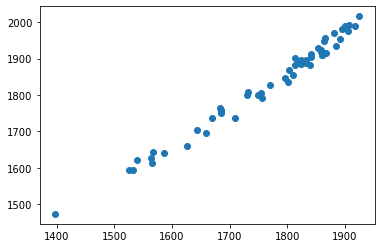

In [3]:
plt.plot(composers_df.birth, composers_df.death, 'o')
plt.show()

Different types of plots are accessible when using the `plot` function of DataFrame instances via the `kind` option. The variables to plot are column names passed as keywords instead of whole series like in Matplotlib:

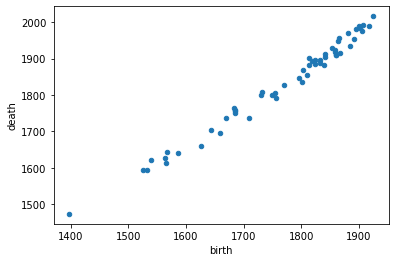

In [4]:
composers_df.plot(x = 'birth', y = 'death', kind = 'scatter')
plt.show()

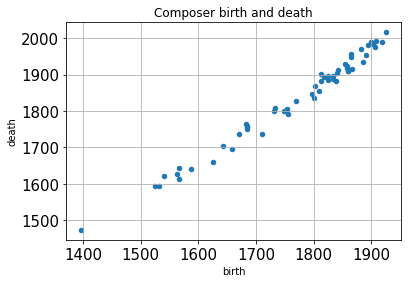

In [5]:
composers_df.plot(x = 'birth', y = 'death', kind = 'scatter',
                  title = 'Composer birth and death', grid = True, fontsize = 15)
plt.show()

Some additional plotting options are available in the plot() module. For example histograms:

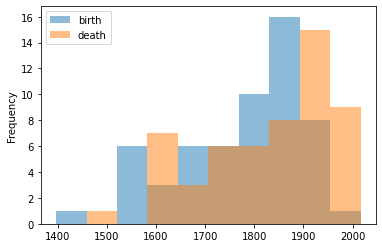

In [6]:
composers_df.plot.hist(alpha = 0.5)
plt.show()

Here you see again the gain from using Pandas: without specifying anything, Pandas made a histogram of the two columns containing numbers, labelled the axis and even added a legend to the plot.

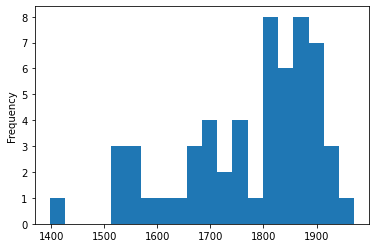

In [7]:
composers_df['birth'].plot.hist(bins = 20)
plt.show()

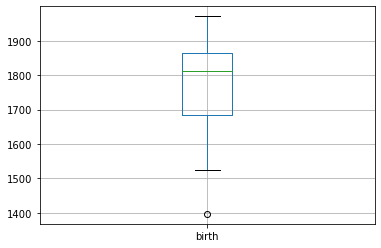

In [8]:
composers_df.boxplot(column = 'birth')
plt.show()

# Matplotlib

recommended reading: 
- [Sample plots in Matplotlib](https://matplotlib.org/stable/gallery/index.html)

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:
* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI.
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* The figure can be controlled programmatically.

In [9]:
t = np.arange(0,10,0.1)
sin_t = np.sin(2*np.pi*t/5)
cos_t = np.cos(2*np.pi*t/5)


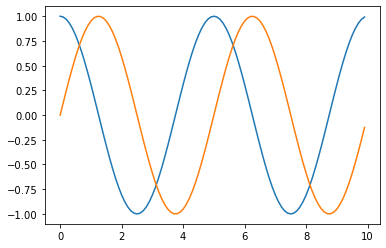

In [10]:
plt.plot(t,cos_t)
plt.plot(t,sin_t)

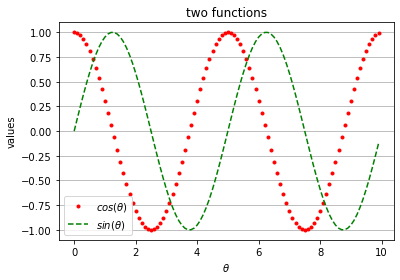

In [11]:
plt.plot(t,cos_t,'.r', label = r"$cos(\theta)$")
plt.plot(t,sin_t,'--g', label = r"$sin(\theta)$")
plt.title('two functions')
plt.xlabel(r"$\theta$")
plt.ylabel('values')
plt.ylim([-1.1,1.1])
plt.legend()
plt.grid(axis = 'y')

# plt.legend(loc=0) # let matplotlib decide the optimal location
# plt.legend(loc=1) # upper right corner
# plt.legend(loc=2) # upper left corner
# plt.legend(loc=3) # lower left corner
# plt.legend(loc=4) # lower right corner
# # .. many more options are available

plt.savefig('img/example_figure.png', format = 'png')
plt.show()

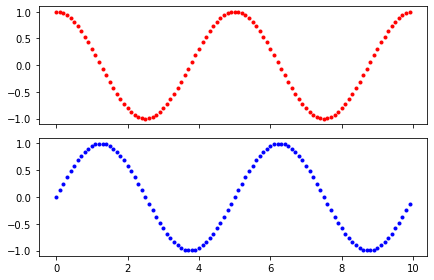

In [12]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(t,cos_t,'.r')
axarr[1].plot(t,sin_t,'.b')
plt.tight_layout()
plt.show()

In [13]:
x = np.linspace(0, 5, 11)

<IPython.core.display.Javascript object>


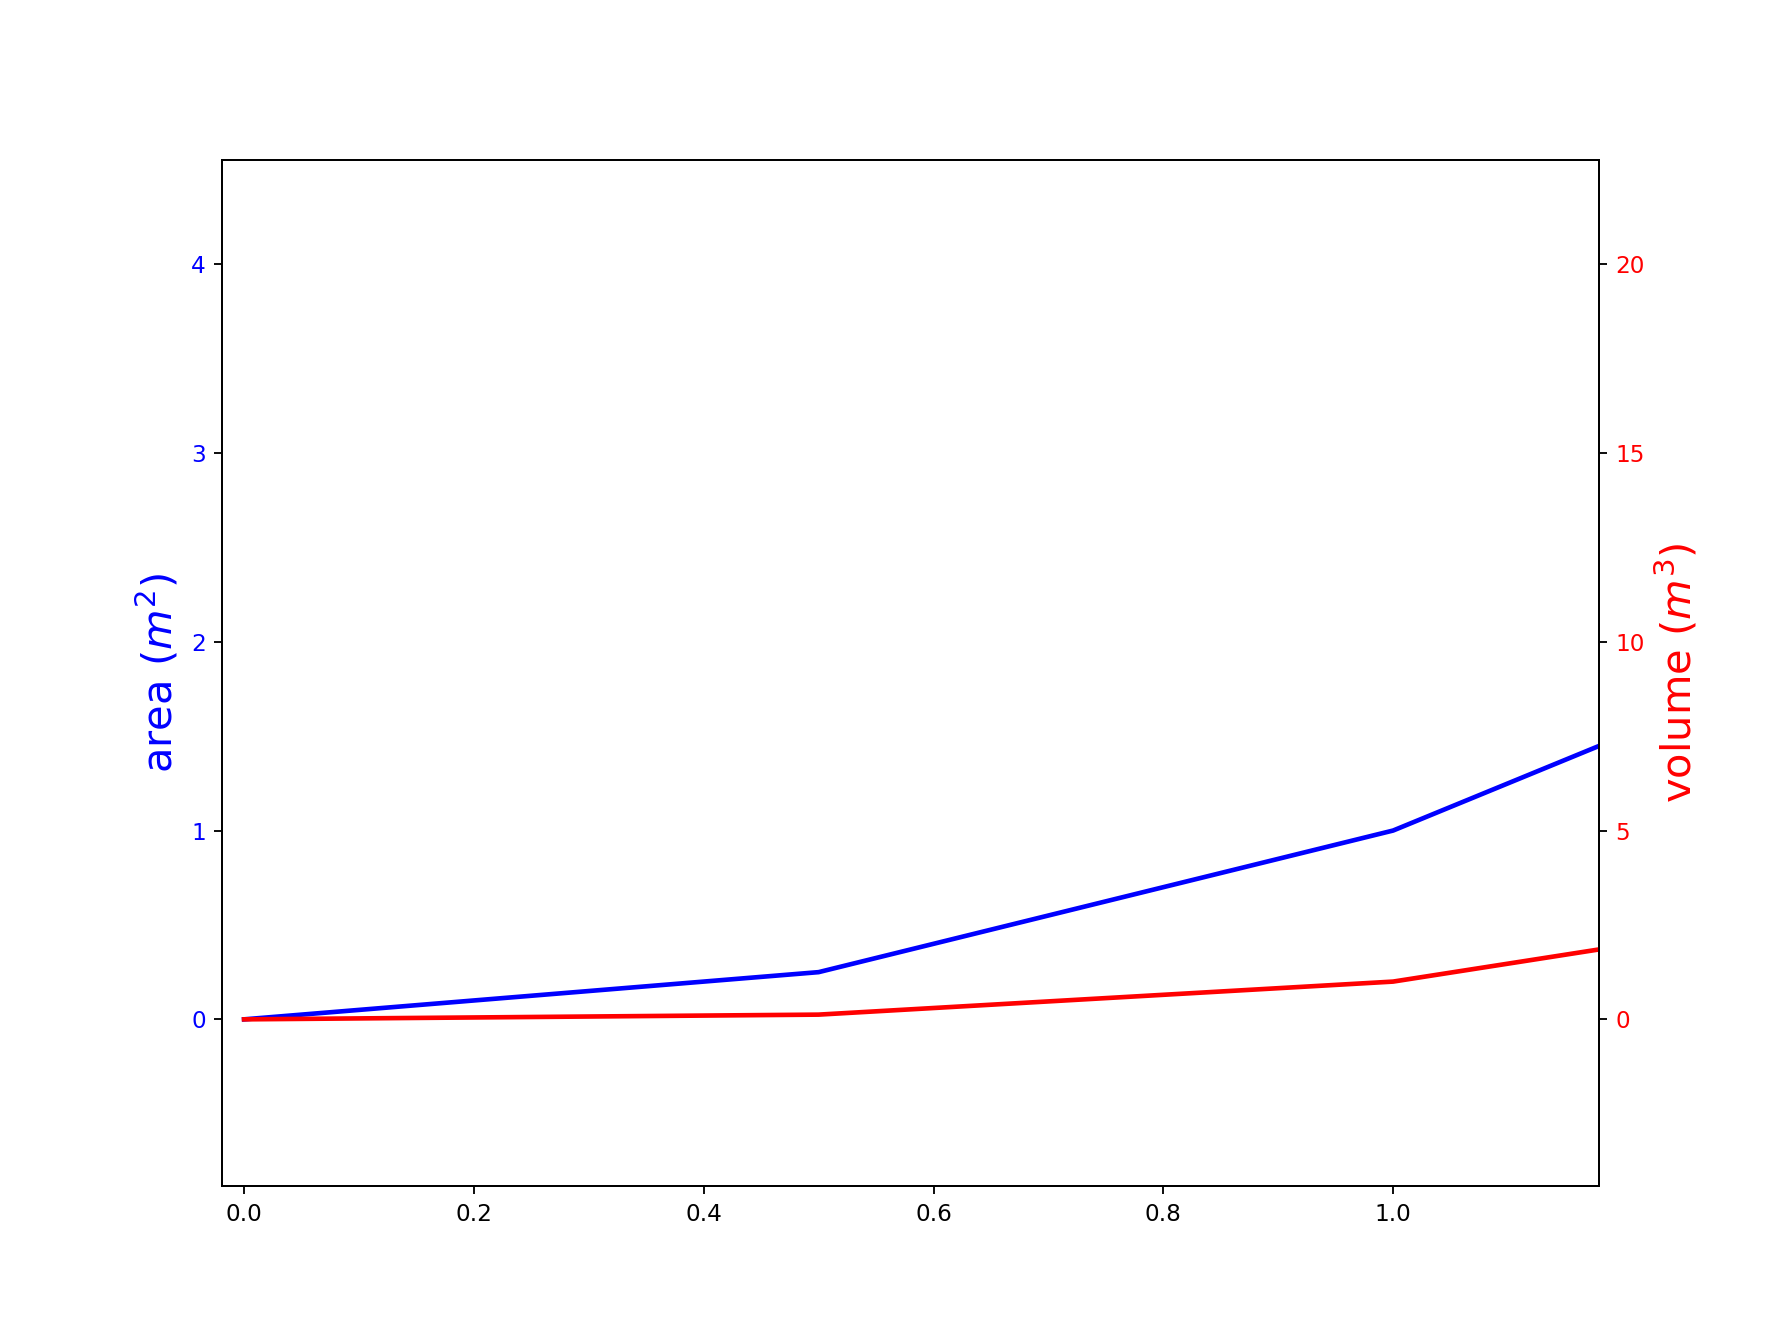

In [17]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

plt.show()

In [18]:
# allow to use matplotlib interactively and set the desired backend
%matplotlib inline
# %matplotlib notebook
# %matplotlib --list

## Magic functions

[IPython's 'magic' functions](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

- The magic function system provides a series of **functions which allow you to
control the behavior of IPython itself**, plus a lot of system-type
features. There are two kinds of magics, **line-oriented** and **cell-oriented**:
    - **Line magics are prefixed with the % character** and work much like OS
command-line calls. They get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.
    - **Cell magics are prefixed with %% (a double % character)**, and they are functions that get as an argument not only the rest of the line, but also the lines below it in a separate argument. These magics are called with two arguments: the rest of the call line and the body of the cell, consisting of the lines below the first.

In [19]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [20]:
%whos

Variable       Type           Data/Info
---------------------------------------
ax1            AxesSubplot    AxesSubplot(0.125,0.11;0.775x0.77)
ax2            AxesSubplot    AxesSubplot(0.125,0.11;0.775x0.77)
axarr          ndarray        2: 2 elems, type `object`, 16 bytes
composers_df   DataFrame                    birth   dea<...>N         modern      USA
cos_t          ndarray        100: 100 elems, type `float64`, 800 bytes
f              Figure         Figure(432x288)
fig            Figure         Figure(1776.67x1333.33)
label          Text           Text(1, 140.0, '140')
np             module         <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd             module         <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt            module         <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sin_t          ndarray        100: 100 elems, type `float64`, 800 bytes
t              ndarray        100: 100 elems, type `float64`, 800 bytes
x           

In [21]:
%whos ndarray

Variable   Type       Data/Info
-------------------------------
axarr      ndarray    2: 2 elems, type `object`, 16 bytes
cos_t      ndarray    100: 100 elems, type `float64`, 800 bytes
sin_t      ndarray    100: 100 elems, type `float64`, 800 bytes
t          ndarray    100: 100 elems, type `float64`, 800 bytes
x          ndarray    11: 11 elems, type `float64`, 88 bytes


In [22]:
%timeit np.zeros((100,100))+5

5.7 µs ± 91.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [23]:
%%timeit 

np.zeros((100,100))+5
np.zeros((100,100))+5

11.3 µs ± 131 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
